In [1]:
# llamada a las librerias
import numpy as np # librería para cálculos matematicos

# llamada a librerias definidas
import funcionesCalculo as ft # libreria de funciones auxiliares y de cálculo


# importacion de datos del terreno del archivo datos_terreno.xlsx
espesor,cotas,az,nivel_freatico,pe_seco,pe_saturado,cu,cohesion,fi,tipo_datos=ft.datos_terreno()

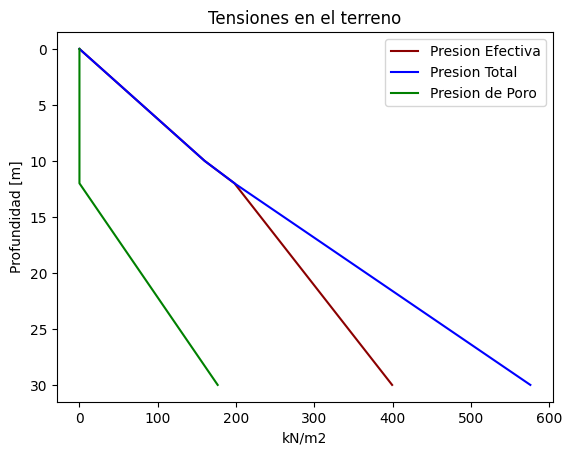

In [2]:
ft.grafica_tensiones(cotas,pe_seco,pe_saturado,nivel_freatico)

In [ ]:
for L in np.arange(15,16):
    print('L=',L)
    for D in np.arange(0.600,0.800,0.05):
        print('D=',D)
        ft.qp_CTEgr(cotas,nivel_freatico,pe_saturado,pe_seco,fi,D,L)
        print()
    print()

In [3]:
ft.promedioPunta(0.65,15,cotas,fi)

15.0

In [4]:
cotas

[0, 10, 25]

In [ ]:
for z in np.arange(0,max(cotas)+0.5,0.5):
    print(z,ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,z))

In [61]:
# creacioin de la lista de los valores de control

listafuste=ft.insertar_valor(cotas,nivel_freatico)
print(listafuste)
L=15


[0, 6.5, 10, 25]


In [4]:

listafuste=ft.insertar_valor(cotas,nivel_freatico)
print(listafuste)
L=30
listaTensionesFuste=[]
for z in np.arange(0,len(listafuste)-1):

    zfinf=listafuste[z]
    zfsup=listafuste[z+1]

    if (zfinf<L) and (zfsup<L):
        presion_media=(ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,zfinf)+ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,zfsup))/2
        listaTensionesFuste.append(presion_media)
    elif (zfinf<L) and (L<=zfsup):
        presion_media=(ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,zfinf)+ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,L))/2
        listaTensionesFuste.append(presion_media)
        break

print(listaTensionesFuste)

    #print(z,zfinf,zfsup)
    #print(zp,ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,zp))

[0, 6.5, 10, 30]
[52.0, 135.5, 377.0]


In [7]:
print(ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,30))

587.0


In [4]:

# Cálculo de las tensiones efectivas medias en el nivel considerado



if nivel_freatico not in cotas: 
    listafuste = ft.insertar_valor(cotas, nivel_freatico)
else:
    listafuste=cotas


L=30
listaTensionesFuste=[]
for z in np.arange(0,len(listafuste)-1):

    zfinf=listafuste[z]
    zfsup=listafuste[z+1]

    if (zfinf<L) and (zfsup<L):
        presion=ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,zfinf)
        u_z=ft.n_freatico(nivel_freatico,zfinf)*9.81
        presion_efectiva_inf=presion-u_z

        presion=ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,zfsup)
        u_z=ft.n_freatico(nivel_freatico,zfsup)*9.81
        presion_efectiva_sup=presion-u_z

        presion_media=(presion_efectiva_inf+presion_efectiva_sup)*0.5
 
        listaTensionesFuste.append(presion_media)
        
    elif (zfinf<L) and (L<=zfsup):
        
        presion=ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,zfinf)
        u_z=ft.n_freatico(nivel_freatico,zfinf)*9.81
        presion_efectiva_inf=presion-u_z

        presion=ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,L)
        u_z=ft.n_freatico(nivel_freatico,L)*9.81
        presion_efectiva_sup=presion-u_z

        presion_media=(presion_efectiva_inf+presion_efectiva_sup)*0.5 
           
        listaTensionesFuste.append(presion_media)
        break

print(listafuste)
print(listaTensionesFuste)

[0, 10, 12, 30]
[80.0, 179.0, 298.71]


In [14]:
# Cálculo de las tensiones efectivas medias en el nivel considerado

def presionEfectivaMedia(zfinf,zfsup):
    # funcion auxiliar para el cálculo de la tension efectiva media 
    
    presion=ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,zfinf)
    u_z=ft.n_freatico(nivel_freatico,zfinf)*9.81
    presion_efectiva_inf=presion-u_z

    
    presion=ft.presion_total(cotas,nivel_freatico,pe_saturado,pe_seco,zfsup)
    u_z=ft.n_freatico(nivel_freatico,zfsup)*9.81
    presion_efectiva_sup=presion-u_z

    presion_media=(presion_efectiva_inf+presion_efectiva_sup)*0.5

    return presion_media


if nivel_freatico not in cotas: 
    listafuste = ft.insertar_valor(cotas, nivel_freatico)
else:
    listafuste=cotas


L=30
listaTensionesFuste=[]

for z in np.arange(0,len(listafuste)-1):

    zfinf=listafuste[z]
    zfsup=listafuste[z+1]

    if (zfinf<L) and (zfsup<L):
        presion_media=presionEfectivaMedia(zfinf,zfsup)
        listaTensionesFuste.append(presion_media)
        
    elif (zfinf<L) and (L<=zfsup):
        presion_media=presionEfectivaMedia(zfinf,L)
        listaTensionesFuste.append(presion_media)
        break # se llega al topo maximo

print(listafuste)
print(listaTensionesFuste)



[0, 10, 12, 30]
[80.0, 179.0, 298.71]


In [25]:
for tf in np.arange(0,len(listafuste)-1):
    print(listaTensionesFuste[tf]*np.tan(np.deg2rad(fi[ft.parametro_terreno(cotas,6)])))

37.30461265239989
83.46907080974475
139.29076056747962


In [21]:
fi

[0, 25, 15]

25